In [17]:
import sys
from prody import GNM,parsePDB,ANM,calcTempFactors
from prody.dynamics.anm import ANMBase
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from Bio.PDB import *
from scipy.optimize import least_squares
ion()

In [2]:
test_case = parsePDB("1fas.pdb")
calpha_test = test_case.select('calpha')

@> 573 atoms and 1 coordinate set(s) were parsed in 0.29s.


In [3]:
parser = PDBParser()
structure = parser.get_structure("1fas","1fas.pdb")

In [4]:
bfactor = []
for i in structure.get_atoms():
    if i.get_name() == 'CA':
        bfactor.append(i.get_bfactor())
bfactor = np.array(bfactor)

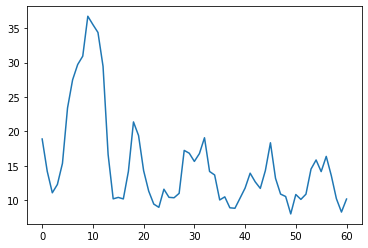

In [5]:
plt.plot(bfactor)


In [6]:
#tradition GNM
gnm = GNM("1fas")
gnm.buildKirchhoff(calpha_test,cutoff=10., gamma=1.)
gnm.calcModes(n_modes = 50)

@> Kirchhoff was built in 0.00s.
@> 50 modes were calculated in 0.01s.


In [7]:
gnm.bfactor = calcTempFactors(gnm,calpha_test)

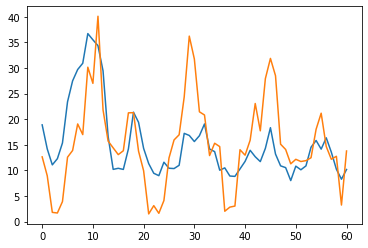

In [8]:
plt.plot(bfactor)
plt.plot(gnm.bfactor)

In [9]:
#tradition ANM
anm = ANM("1fas")
anm.buildHessian(calpha_test,cutoff=8., gamma=1.)
anm.calcModes(n_modes = 50)

@> Hessian was built in 0.01s.
@> 50 modes were calculated in 0.01s.


In [10]:
anm.bfactor = calcTempFactors(anm,calpha_test)

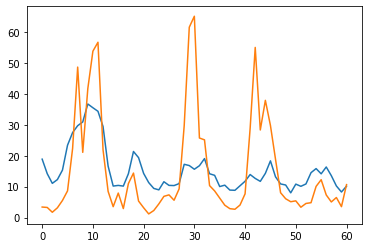

In [11]:
plt.plot(bfactor)
plt.plot(anm.bfactor)

In [12]:
#pfENM
def pfENM_gamma(dist2,i,j):
    return dist2
pfENM = GNM("1fas")
pfENM.buildKirchhoff(calpha_test,cutoff=10., gamma=pfENM_gamma)
pfENM.calcModes(n_modes = 50)

@> Kirchhoff was built in 0.00s.
@> 50 modes were calculated in 0.01s.


In [13]:
pfENM.bfactor = calcTempFactors(pfENM,calpha_test)

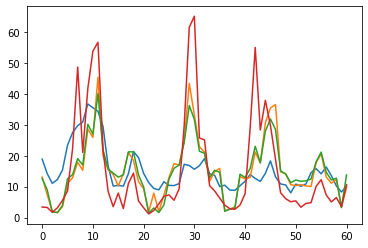

In [14]:
plt.plot(bfactor)
plt.plot(pfENM.bfactor)
plt.plot(gnm.bfactor)
plt.plot(anm.bfactor)

In [15]:
#mENM
def mENM_gamma(dist2,i,j):
    return dist2
mENM = GNM("1fas")
mENM.buildKirchhoff(calpha_test,cutoff=10., gamma=mENM_gamma)
mENM.calcModes(n_modes = 50)

@> Kirchhoff was built in 0.00s.
@> 50 modes were calculated in 0.00s.
